
 Dataset Loaded Successfully!
Dataset Shape: (195, 24)

 Sample Data:
             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA 

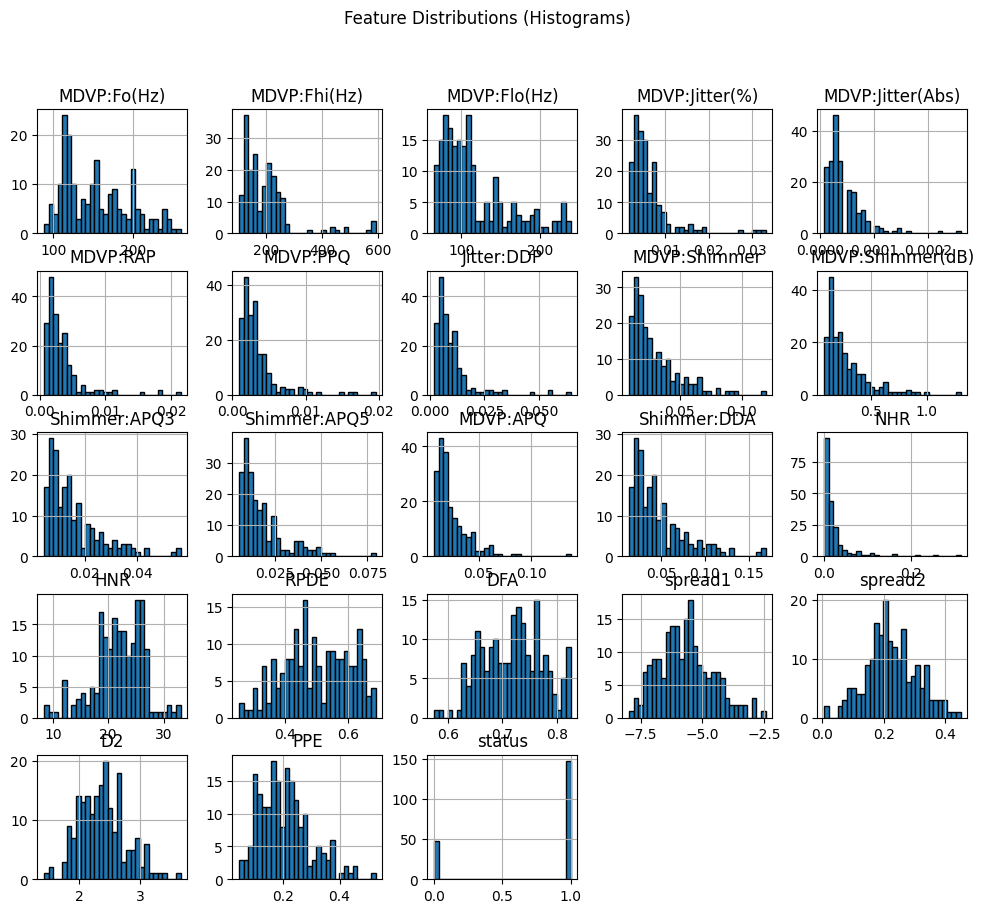

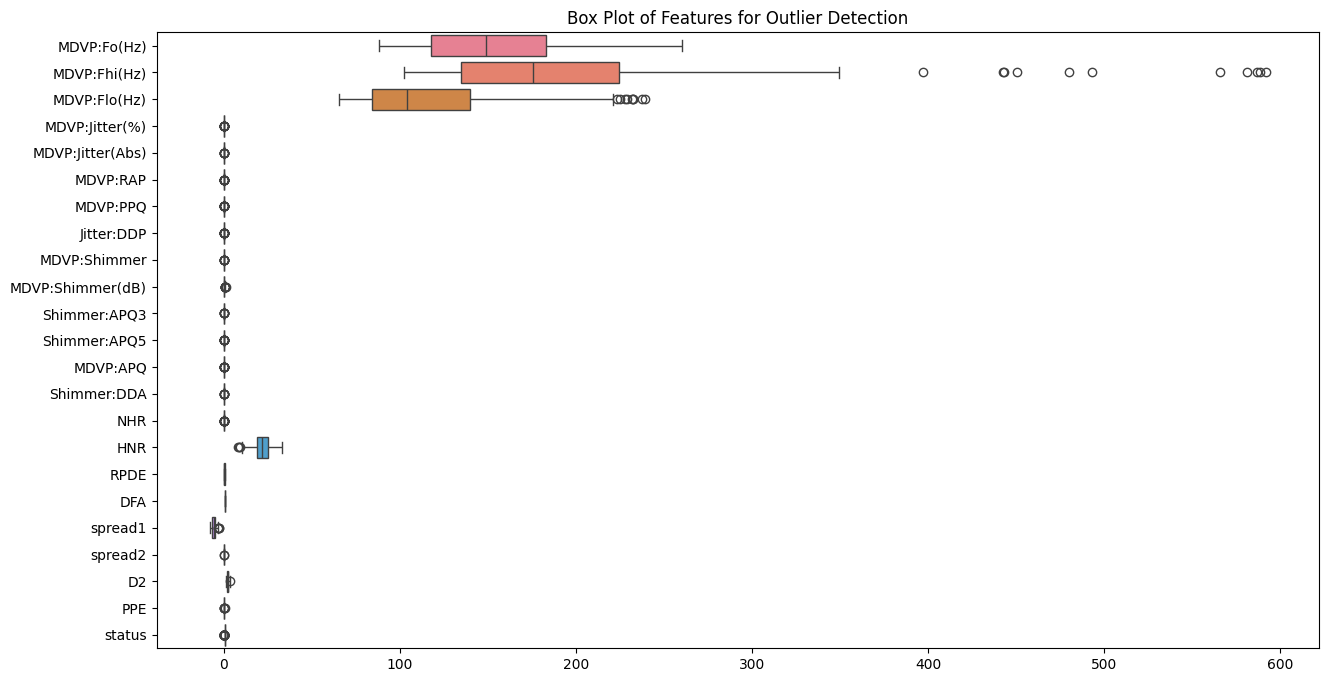

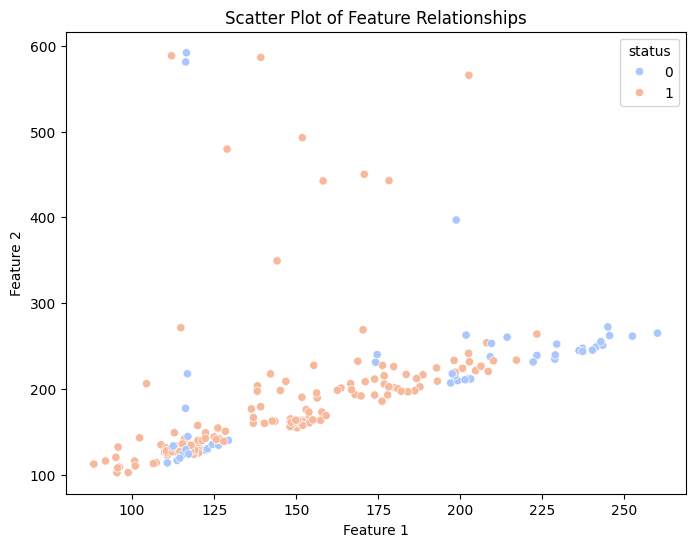


 Features Shape: (195, 22), Labels Shape: (195,)

 Dataset Split: Training = (156, 22), Testing = (39, 22)
[LightGBM] [Info] Number of positive: 118, number of negative: 38
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001974 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1119
[LightGBM] [Info] Number of data points in the train set: 156, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.756410 -> initscore=1.133098
[LightGBM] [Info] Start training from score 1.133098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


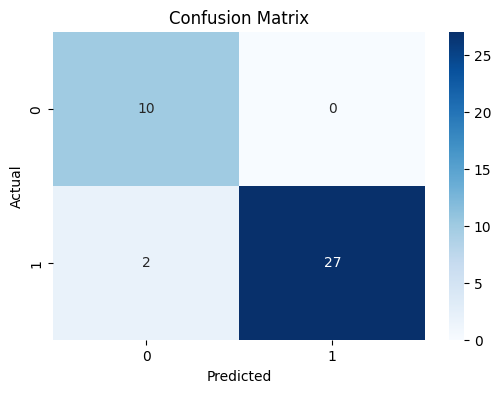

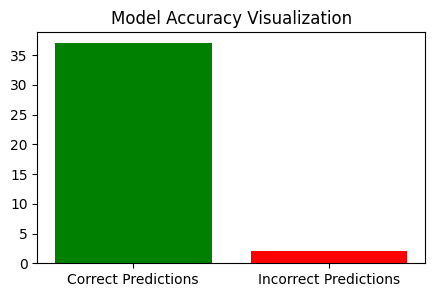


 Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.93      0.96        29

    accuracy                           0.95        39
   macro avg       0.92      0.97      0.94        39
weighted avg       0.96      0.95      0.95        39


 Model Saved as 'model.pkl'

Model Loaded Successfully!

 Prediction Result:
Predicted Class: Parkinson’s Detected
Probability Score: [[0.00189578 0.99810422]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from lightgbm import LGBMClassifier

# Step 1: Load the Dataset and Visualize
def load_dataset(file_path):
    """Loads dataset, visualizes data distribution, and returns features (X) and labels (y)."""
    dataset = pd.read_csv('/content/Parkinson.csv')
    print("\n Dataset Loaded Successfully!")
    print(f"Dataset Shape: {dataset.shape}")

    # Display first 5 rows
    print("\n Sample Data:")
    print(dataset.head())

    # Histograms for feature distribution
    dataset.hist(figsize=(12, 10), bins=30, edgecolor='black')
    plt.suptitle("Feature Distributions (Histograms)")
    plt.show()

    # Box plots for outlier detection
    plt.figure(figsize=(15, 8))
    sns.boxplot(data=dataset, orient="h")
    plt.title("Box Plot of Features for Outlier Detection")
    plt.show()

    # Scatter plot for two selected features
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=dataset.iloc[:, 1], y=dataset.iloc[:, 2], hue=dataset.iloc[:, -1], palette='coolwarm')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Scatter Plot of Feature Relationships")
    plt.show()

    # Extract Features (X) and Target Labels (y)
    X = dataset.iloc[:, 1:-1].values
    y = dataset.iloc[:, -1].values

    print(f"\n Features Shape: {X.shape}, Labels Shape: {y.shape}")
    return X, y

# Step 2: Split the Dataset into Training & Testing Sets
def split_dataset(X, y, test_size=0.2, random_state=0):
    """Splits dataset into training and testing sets."""
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    print(f"\n Dataset Split: Training = {X_train.shape}, Testing = {X_test.shape}")
    return X_train, X_test, y_train, y_test

# Step 3: Train the LightGBM Classifier
def train_model(X_train, y_train):
    """Trains a LightGBM classifier with predefined hyperparameters."""
    classifier = LGBMClassifier(n_estimators=50, learning_rate=0.1, max_depth=5)
    classifier.fit(X_train, y_train)
    print("\n Model Training Complete!")
    return classifier

# Step 4: Evaluate Model Performance & Visualize Results
def evaluate_model(model, X_test, y_test):
    """Evaluates the trained model using accuracy, confusion matrix, and classification report."""
    y_pred = model.predict(X_test)

    # Calculate Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n Model Accuracy: {accuracy * 100:.2f}%")

    # Confusion Matrix Visualization
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    # Accuracy Bar Graph
    plt.figure(figsize=(5, 3))
    plt.bar(['Correct Predictions', 'Incorrect Predictions'],
            [accuracy * len(y_test), (1 - accuracy) * len(y_test)], color=['green', 'red'])
    plt.title("Model Accuracy Visualization")
    plt.show()

    # Detailed Classification Report
    print("\n Classification Report:")
    print(classification_report(y_test, y_pred))

# Step 5: Save & Load the Model
def save_model(model, filename="model.pkl"):
    """Saves the trained model to a file using pickle."""
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"\n Model Saved as '{filename}'")

def load_model(filename="model.pkl"):
    """Loads a saved model from a file."""
    with open(filename, 'rb') as file:
        model = pickle.load(file)
    print("\nModel Loaded Successfully!")
    return model

# Step 6: Make Predictions
def make_prediction(model, sample_input):
    """Takes a trained model and a sample input and returns the prediction."""
    sample_array = np.array([sample_input])  # Convert input to NumPy array
    prediction = model.predict(sample_array)

    probability = model.predict_proba(sample_array) if hasattr(model, "predict_proba") else None

    # Print Results
    print("\n Prediction Result:")
    print(f"Predicted Class: {'Parkinson’s Detected' if prediction[0] == 1 else 'Healthy'}")
    if probability is not None:
        print(f"Probability Score: {probability}")

    return prediction, probability

#  Execution Flow (Organized Call Sequence)
if __name__ == "__main__":
    file_path = "/content/Parkinson.csv"  # Ensure correct dataset path

    # Load & Split Data
    X, y = load_dataset(file_path)
    X_train, X_test, y_train, y_test = split_dataset(X, y)

    # Train & Evaluate Model
    classifier = train_model(X_train, y_train)
    evaluate_model(classifier, X_test, y_test)

    # Save & Load Model
    save_model(classifier)
    model = load_model()

    # Test Sample Prediction
    test_input = [119.992, 157.302, 74.997, 0.00784, 0.00007, 0.0037, 0.00554, 0.01109, 0.04374, 0.426,
                  0.02182, 0.0313, 0.02971, 0.06545, 0.02211, 21.033, 0.414783, 0.815285, -4.813031,
                  0.266482, 2.301442, 0.284654]
    make_prediction(model, test_input)


 Dataset Loaded Successfully!
Dataset Shape: (195, 24)

 Sample Data:
             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA 

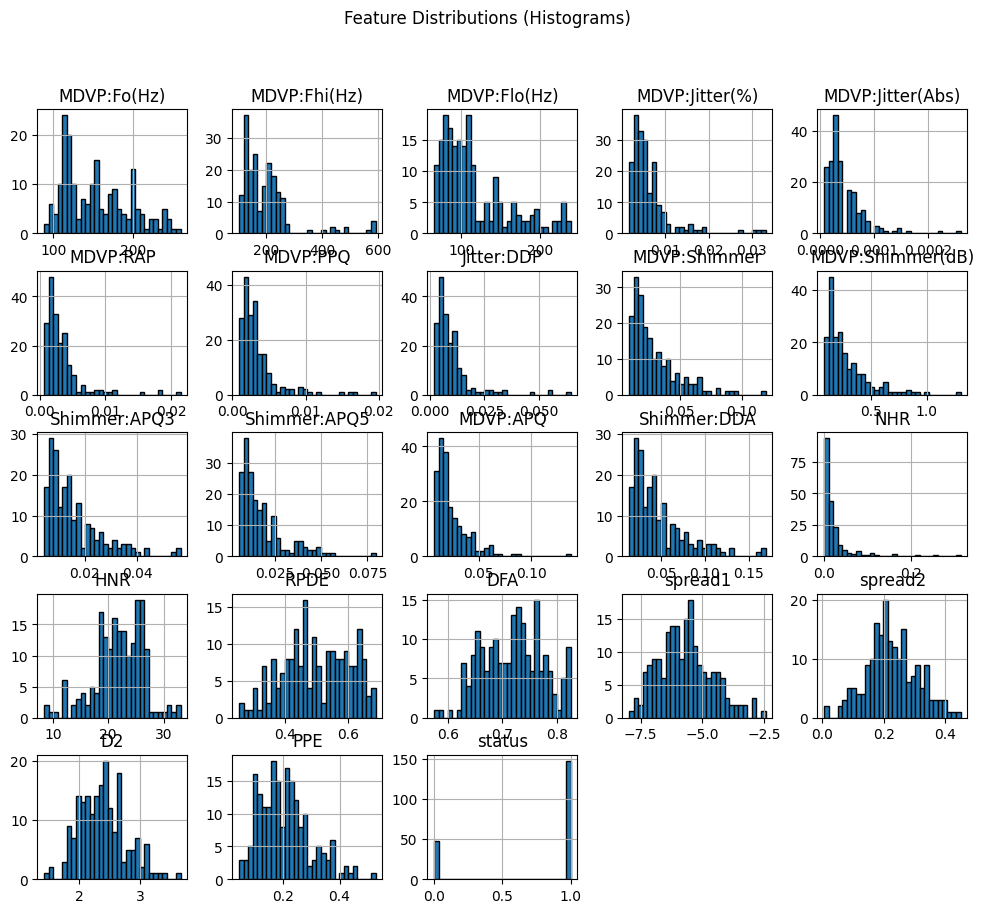

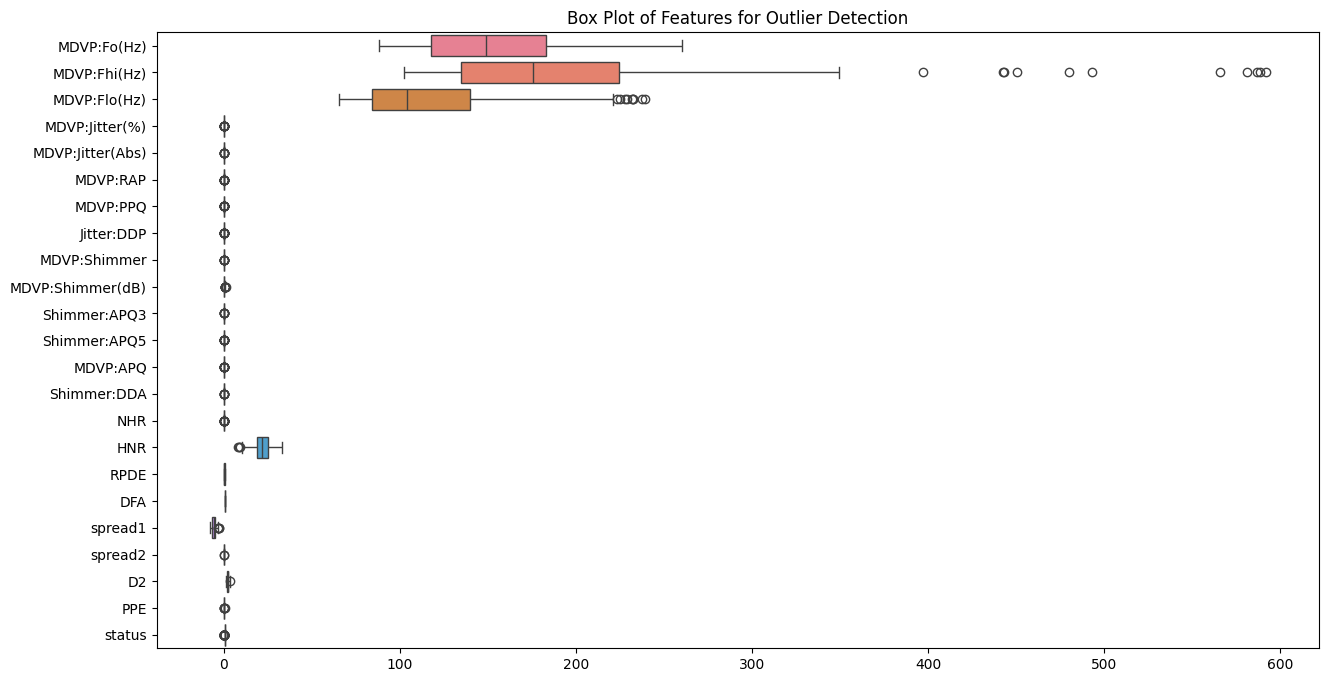

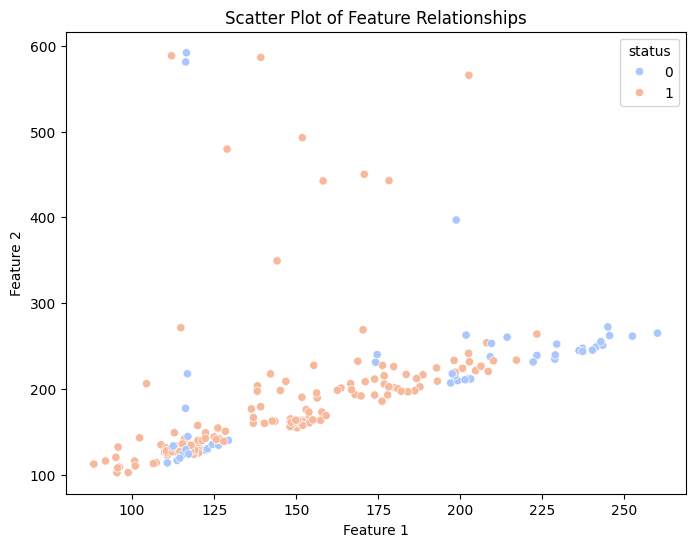


 Features Shape: (195, 22), Labels Shape: (195,)

 Dataset Split: Training = (156, 22), Testing = (39, 22)
[LightGBM] [Info] Number of positive: 118, number of negative: 38
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000107 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1119
[LightGBM] [Info] Number of data points in the train set: 156, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.756410 -> initscore=1.133098
[LightGBM] [Info] Start training from score 1.133098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:44:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


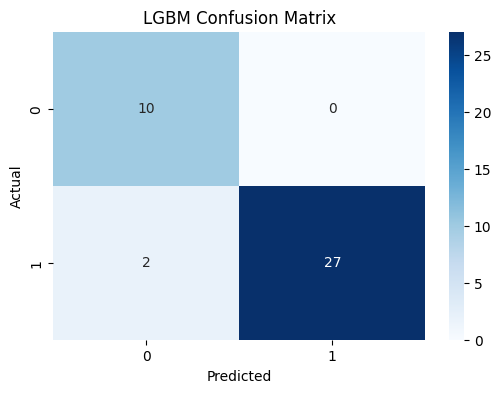

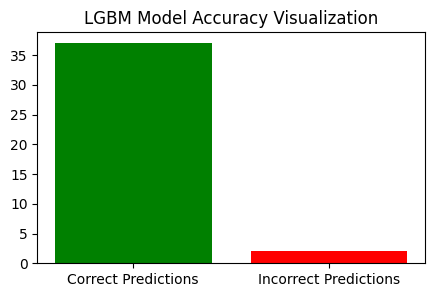


 LGBM Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.93      0.96        29

    accuracy                           0.95        39
   macro avg       0.92      0.97      0.94        39
weighted avg       0.96      0.95      0.95        39


 XGB Model Accuracy: 92.31%


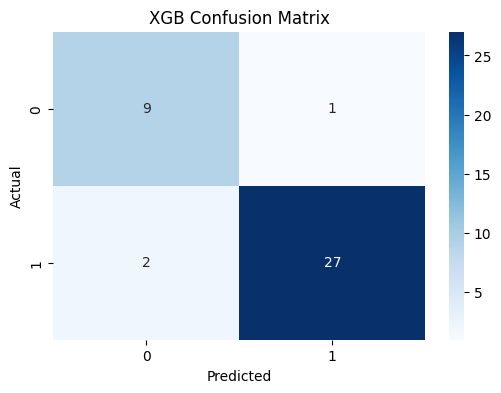

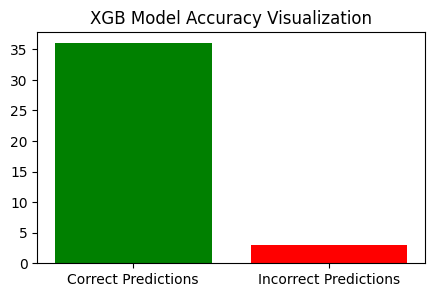


 XGB Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.96      0.93      0.95        29

    accuracy                           0.92        39
   macro avg       0.89      0.92      0.90        39
weighted avg       0.93      0.92      0.92        39


 HYBRID Model Accuracy: 94.87%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


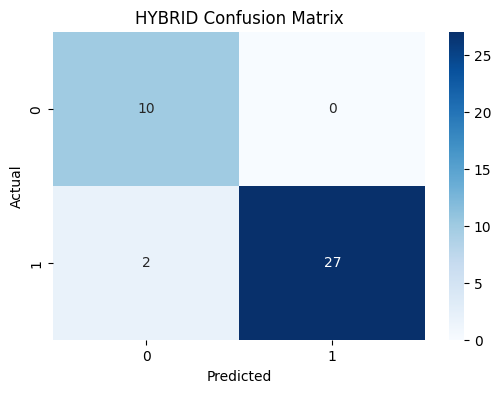

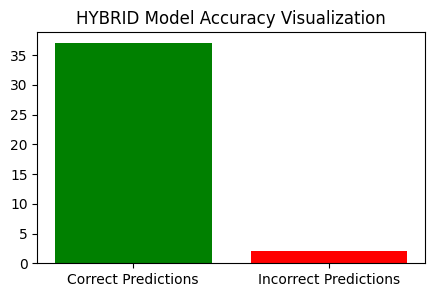


 HYBRID Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.93      0.96        29

    accuracy                           0.95        39
   macro avg       0.92      0.97      0.94        39
weighted avg       0.96      0.95      0.95        39


 Model Saved as 'lgbm_model.pkl'

 Model Saved as 'xgb_model.pkl'

 LGBM Prediction Result:
Predicted Class: Parkinson’s Detected
Probability Score: [[0.00189578 0.99810422]]

 XGB Prediction Result:
Predicted Class: Parkinson’s Detected
Probability Score: [[0.00722444 0.99277556]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from lightgbm import LGBMClassifier
import xgboost as xgb

# [Your existing load_dataset, split_dataset functions remain unchanged]

# Step 3a: Train LightGBM Classifier (unchanged)
def train_lgbm_model(X_train, y_train):
    classifier = LGBMClassifier(n_estimators=50, learning_rate=0.1, max_depth=5)
    classifier.fit(X_train, y_train)
    print("\n LightGBM Model Training Complete!")
    return classifier

# Step 3b: Train XGBoost Classifier
def train_xgb_model(X_train, y_train):
    """Trains an XGBoost classifier with predefined hyperparameters."""
    classifier = xgb.XGBClassifier(n_estimators=50, learning_rate=0.1, max_depth=5, use_label_encoder=False, eval_metric='logloss')
    classifier.fit(X_train, y_train)
    print("\n XGBoost Model Training Complete!")
    return classifier

# Step 3c: Hybrid Prediction (Ensemble)
def hybrid_prediction(lgbm_model, xgb_model, X_test):
    """Combines predictions from LightGBM and XGBoost using averaging."""
    lgbm_probs = lgbm_model.predict_proba(X_test)[:, 1]  # Probability of class 1
    xgb_probs = xgb_model.predict_proba(X_test)[:, 1]    # Probability of class 1
    hybrid_probs = (lgbm_probs + xgb_probs) / 2        # Average probabilities
    hybrid_pred = (hybrid_probs > 0.5).astype(int)      # Threshold at 0.5
    return hybrid_pred, hybrid_probs

# Step 4: Evaluate Model Performance (modified for hybrid)
def evaluate_model(model, X_test, y_test, model_type='lgbm', hybrid_pred=None):
    """Evaluates the trained model or hybrid prediction."""
    if hybrid_pred is not None:
        y_pred = hybrid_pred
        model_type = 'hybrid'
    else:
        y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n {model_type.upper()} Model Accuracy: {accuracy * 100:.2f}%")

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model_type.upper()} Confusion Matrix")
    plt.show()

    plt.figure(figsize=(5, 3))
    plt.bar(['Correct Predictions', 'Incorrect Predictions'],
            [accuracy * len(y_test), (1 - accuracy) * len(y_test)], color=['green', 'red'])
    plt.title(f"{model_type.upper()} Model Accuracy Visualization")
    plt.show()

    print(f"\n {model_type.upper()} Classification Report:")
    print(classification_report(y_test, y_pred))

# [Your existing save_model, load_model, make_prediction functions remain mostly unchanged]
# Update make_prediction to handle XGBoost and hybrid if needed:
def make_prediction(model, sample_input, model_type='lgbm'):
    sample_array = np.array([sample_input])
    prediction = model.predict(sample_array)
    probability = model.predict_proba(sample_array) if hasattr(model, "predict_proba") else None

    print(f"\n {model_type.upper()} Prediction Result:")
    print(f"Predicted Class: {'Parkinson’s Detected' if prediction[0] == 1 else 'Healthy'}")
    if probability is not None:
        print(f"Probability Score: {probability}")
    return prediction, probability

# Execution Flow
if __name__ == "__main__":
    file_path = "/content/Parkinson.csv"

    # Load & Split Data
    X, y = load_dataset(file_path)
    X_train, X_test, y_train, y_test = split_dataset(X, y)

    # Train Models
    lgbm_model = train_lgbm_model(X_train, y_train)
    xgb_model = train_xgb_model(X_train, y_train)

    # Evaluate Individual Models
    evaluate_model(lgbm_model, X_test, y_test, model_type='lgbm')
    evaluate_model(xgb_model, X_test, y_test, model_type='xgb')

    # Hybrid Prediction & Evaluation
    hybrid_pred, hybrid_probs = hybrid_prediction(lgbm_model, xgb_model, X_test)
    evaluate_model(None, X_test, y_test, model_type='hybrid', hybrid_pred=hybrid_pred)

    # Save Models
    save_model(lgbm_model, "lgbm_model.pkl")
    save_model(xgb_model, "xgb_model.pkl")

    # Test Sample Prediction
    test_input = [119.992, 157.302, 74.997, 0.00784, 0.00007, 0.0037, 0.00554, 0.01109, 0.04374, 0.426,
                  0.02182, 0.0313, 0.02971, 0.06545, 0.02211, 21.033, 0.414783, 0.815285, -4.813031,
                  0.266482, 2.301442, 0.284654]
    make_prediction(lgbm_model, test_input, model_type='lgbm')
    make_prediction(xgb_model, test_input, model_type='xgb')

Cleaned Feature Names: ['MDVPFoHz', 'MDVPFhiHz', 'MDVPFloHz', 'MDVPJitter', 'MDVPJitterAbs', 'MDVPRAP', 'MDVPPPQ', 'JitterDDP', 'MDVPShimmer', 'MDVPShimmerdB', 'ShimmerAPQ3', 'ShimmerAPQ5', 'MDVPAPQ', 'ShimmerDDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']
Training Models...
[LightGBM] [Info] Number of positive: 115, number of negative: 41
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1118
[LightGBM] [Info] Number of data points in the train set: 156, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.737179 -> initscore=1.031360
[LightGBM] [Info] Start training from score 1.031360
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:33:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



LGBM Results:
Accuracy: 92.31%
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39



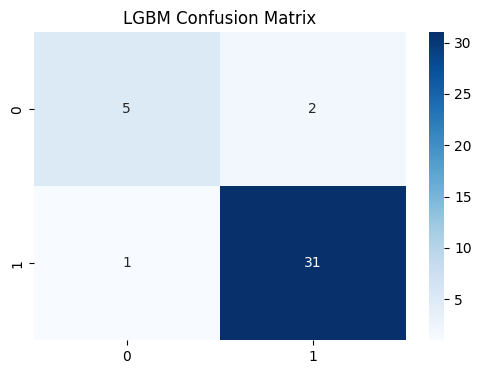


XGB Results:
Accuracy: 94.87%
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



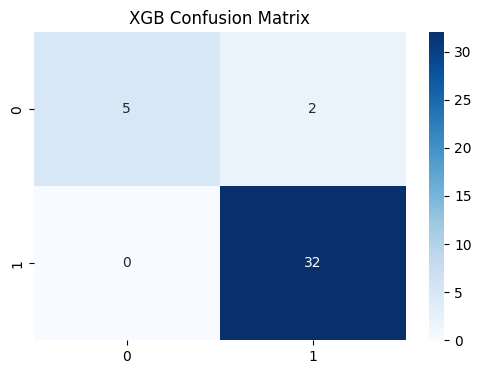

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step

NN Results:
Accuracy: 92.31%
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39



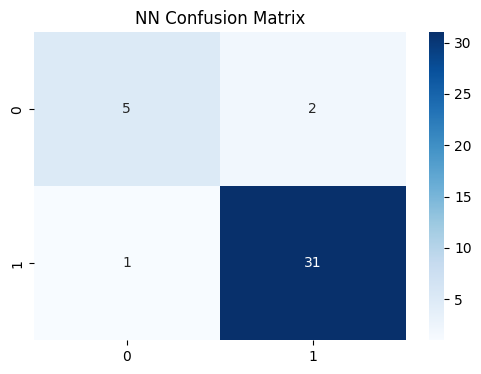


HYBRID Results:
Accuracy: 94.87%
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



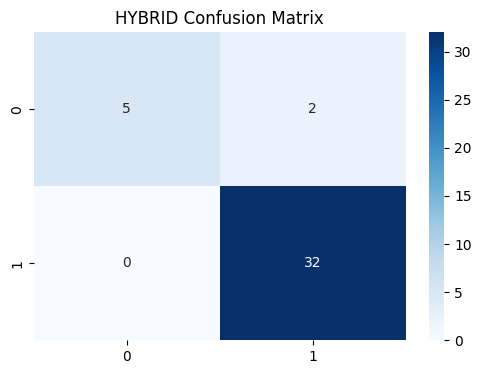


Model Explanations:


/usr/local/lib/python3.11/dist-packages/shap/explainers/_tree.py:544: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


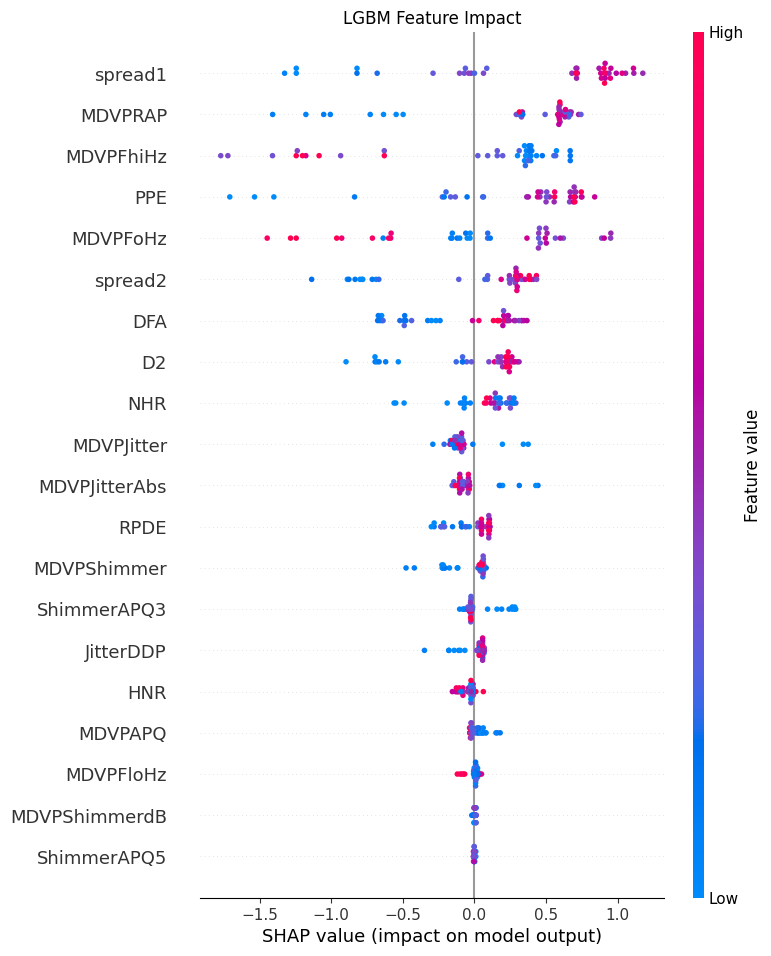

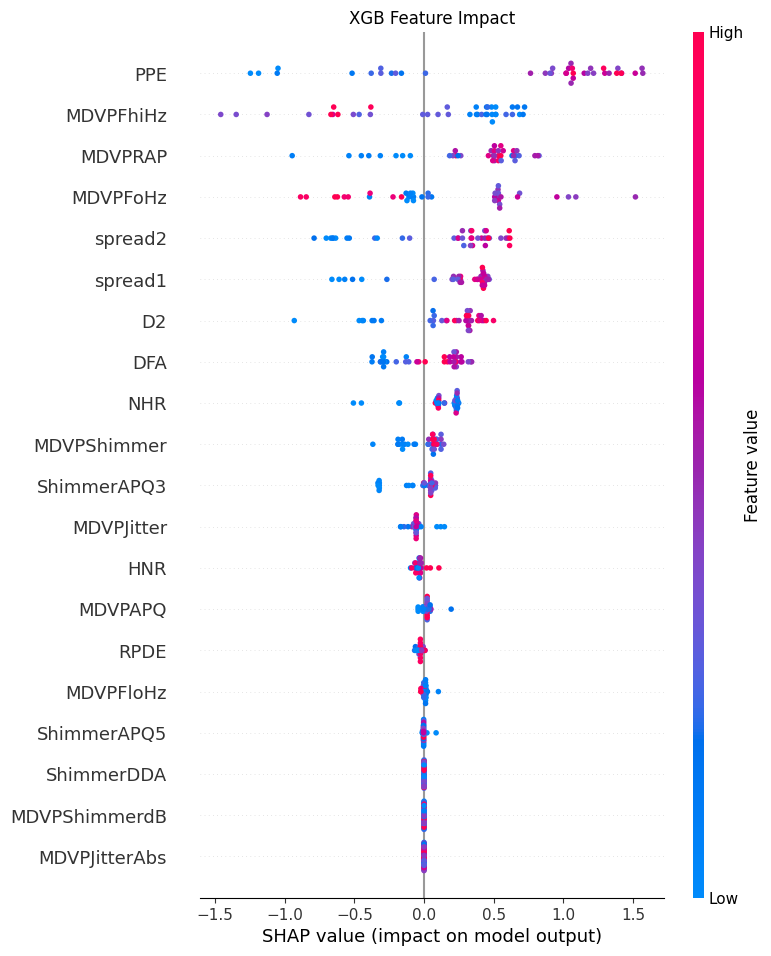

/usr/local/lib/python3.11/dist-packages/shap/explainers/_deep/deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(10, 22))']
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(20, 22))']
  warnings.warn(msg)


NN SHAP values shape: (39, 22, 1)
X shape: (39, 22)
Adjusted NN SHAP values shape: (22, 1)
DeepExplainer failed: SHAP values shape mismatch with features
Falling back to KernelExplainer...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(39, 22))']
  warnings.warn(msg)


  0%|          | 0/39 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━

<Figure size 1000x600 with 0 Axes>

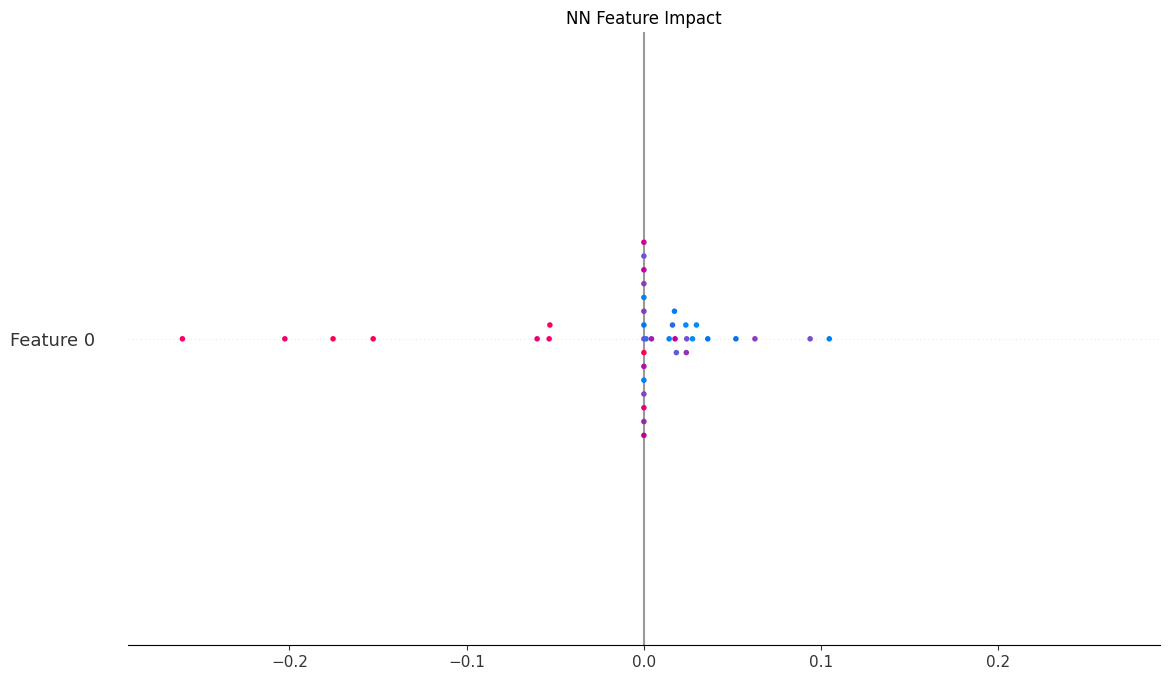


Sample Prediction:
True Label: 1
LightGBM: Parkinson
XGBoost: Parkinson
Hybrid: Parkinson
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/lightgbm/basic.py:722: UserWarning: Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
  _log_warning(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/lightgbm/basic.py:722: UserWarning: Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
  _log_warning(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


NN: Parkinson


In [ ]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
import xgboost as xgb
import shap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from IPython.display import Image, display

# 1. Data Loading and Preprocessing
def load_dataset(file_path):
    data = pd.read_csv(file_path)
    X = data.drop(columns=['name', 'status'])
    X.columns = [''.join(c for c in col if c.isalnum() or c == '_') for col in X.columns]
    y = data['status']
    return X, y

# 2. Data Splitting
def split_dataset(X, y):
    return train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Model Training Functions
def train_lgbm(X_train, y_train):
    model = LGBMClassifier(n_estimators=100, learning_rate=0.05, max_depth=7)
    model.fit(X_train, y_train)
    return model

def train_xgb(X_train, y_train):
    model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=7,
                             use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train, y_train)
    return model

def train_nn(X_train, y_train):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
    return model

# 4. Hybrid Model
def hybrid_predict(lgbm_model, xgb_model, X_test):
    lgbm_probs = lgbm_model.predict_proba(X_test)[:, 1]
    xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
    hybrid_probs = (lgbm_probs + xgb_probs) / 2
    return (hybrid_probs > 0.5).astype(int)

# 5. Evaluation and XAI
def evaluate(model, X_test, y_test, model_type):
    if model_type == 'hybrid':
        y_pred = model
    elif model_type == 'nn':
        y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()
    else:
        y_pred = model.predict(X_test)

    print(f"\n{model_type.upper()} Results:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')  # Fixed y_test to y_pred
    plt.title(f"{model_type.upper()} Confusion Matrix")
    plt.show()

def explain_model(model, X, model_type):
    plt.figure(figsize=(10,6))
    if model_type in ['lgbm', 'xgb']:
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X)
    elif model_type == 'nn':
        try:
            background = X[:10]
            explainer = shap.DeepExplainer(model, background)
            shap_values = explainer.shap_values(X)
            print(f"NN SHAP values shape: {np.array(shap_values).shape}")
            print(f"X shape: {X.shape}")
            shap_values = shap_values[0]
            print(f"Adjusted NN SHAP values shape: {shap_values.shape}")
            assert shap_values.shape[1] == X.shape[1], "SHAP values shape mismatch with features"
        except Exception as e:
            print(f"DeepExplainer failed: {e}")
            print("Falling back to KernelExplainer...")
            explainer = shap.KernelExplainer(model.predict, X[:10])
            shap_values = explainer.shap_values(X, nsamples=50)

    shap.summary_plot(shap_values, X, show=False)
    plt.title(f"{model_type.upper()} Feature Impact")
    plt.show()

# 6. Main Execution
if __name__ == "__main__":
    X, y = load_dataset("/content/Parkinson.csv")
    print("Cleaned Feature Names:", X.columns.tolist())

    X_train, X_test, y_train, y_test = split_dataset(X, y)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print("Training Models...")
    lgbm = train_lgbm(X_train, y_train)
    xgb = train_xgb(X_train, y_train)
    nn = train_nn(X_train_scaled, y_train)

    hybrid_pred = hybrid_predict(lgbm, xgb, X_test)

    evaluate(lgbm, X_test, y_test, 'lgbm')
    evaluate(xgb, X_test, y_test, 'xgb')
    evaluate(nn, X_test_scaled, y_test, 'nn')
    evaluate(hybrid_pred, X_test, y_test, 'hybrid')

    print("\nModel Explanations:")
    explain_model(lgbm, X_test, 'lgbm')
    explain_model(xgb, X_test, 'xgb')
    explain_model(nn, X_test_scaled, 'nn')

    test_sample = X_test.iloc[0:1].values
    print("\nSample Prediction:")
    print(f"True Label: {y_test.iloc[0]}")
    print(f"LightGBM: {'Parkinson' if lgbm.predict(test_sample)[0] else 'Healthy'}")
    print(f"XGBoost: {'Parkinson' if xgb.predict(test_sample)[0] else 'Healthy'}")
    print(f"Hybrid: {'Parkinson' if hybrid_predict(lgbm, xgb, test_sample)[0] else 'Healthy'}")
    print(f"NN: {'Parkinson' if (nn.predict(scaler.transform(test_sample)) > 0.5)[0] else 'Healthy'}")

    pickle.dump(lgbm, open('lgbm_model.pkl', 'wb'))
    pickle.dump(xgb, open('xgb_model.pkl', 'wb'))
    nn.save('nn_model.h5')

In [ ]:
shap.summary_plot

<function shap.plots._beeswarm.summary_legacy(shap_values, features=None, feature_names=None, max_display=None, plot_type=None, color=None, axis_color='#333333', title=None, alpha=1, show=True, sort=True, color_bar=True, plot_size='auto', layered_violin_max_num_bins=20, class_names=None, class_inds=None, color_bar_label='Feature value', cmap=<matplotlib.colors.LinearSegmentedColormap object at 0x7f2f88700bd0>, show_values_in_legend: 'bool' = False, use_log_scale: 'bool' = False, rng: 'np.random.Generator | None' = None)>